In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def AGLMV(name, SP, FORMAT, filename = 'AGLMV.xlsx'):
    '''plot AGMV of your data
    
    ------paras
    name: str
       name of your AGMV plot
    SP: str, should be 'T' or others
       If you don't want to save picture, just assign SP != 'T'.
    FORMAT: str
       format of your picture
    filename: str
       filename of your data. please read 'readme.png' to know the format of your file  
       ######support file format: csv, excel
       
    ------output
    a picture
    '''
    
    if 'xlsx' in filename.split('.'):
        df = pd.read_excel(filename)
    if 'csv' in filename.split('.'):
        df = pd.read_csv(filename)
        
    maker_list = ['D', 'o', 'v', '^', '<', '>', '1', '2', '3', '4']
    algo = [i for i in df['name']] #name of algorithm
    GLMV = [i for i in df['GL/MV']] #GL/MV_1 of algorithm
    A = [i for i in df['Accuracy']] #Accuracy of algorithm

    fig, ax = plt.subplots()
    for i in range(len(algo)):
        x = GLMV[i]
        y = A[i]
        plt.plot(x, y, maker_list[i], label = algo[i], markersize = 8)  
    
    ax.tick_params(axis='x', labelsize=15, pad =3) 
    ax.tick_params(axis='y', labelsize=15)
    #https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html
    ax.ticklabel_format(axis='x', style='sci',scilimits=(0,3))
    plt.ylim([0, 1.1])
    x_m = min(GLMV)
    x_M = max(GLMV)
    plt.xlim([0.95*x_m, 1.05*x_M])
    plt.title(name, size = 20)
    plt.xlabel('$GL^{0.15}/MV_1$', size = 20)
    plt.ylabel('Accuracy', size = 20)
    #https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
    plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
    plt.legend(loc = 'best', prop = {'size': 15})
    if (SP == 'T') and (FORMAT == 'png' or 'pdf' or 'ps' or 'eps' or 'svg'):
        fig.savefig('AGLMV of ' + name + '.' + FORMAT, dpi = 300, format = FORMAT)
    plt.show()

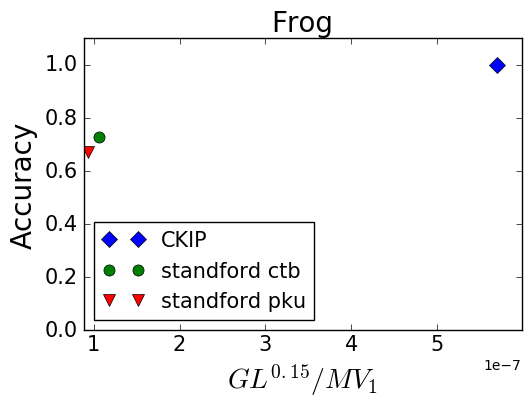

In [3]:
'''
support file format: csv, excel
'''

filename = 'practice-frog.xlsx' #filename of your excel file
name = 'Frog'
SP = 'T' #If you don't want to save picture, just assign SP != 'T'.
FORMAT = 'png' #the format of your picture


AGLMV(name, SP, FORMAT, filename)